In [16]:
import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
#from sklearn.metrics import jaccard_similarity_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from sklearn.metrics import jaccard_score
import seaborn as sns
rcParams['figure.figsize'] = (20, 10)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/DataSet/titanic_train.csv')


# Titanic EDT

In [13]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
len(data)

891

In [8]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Data Analysis

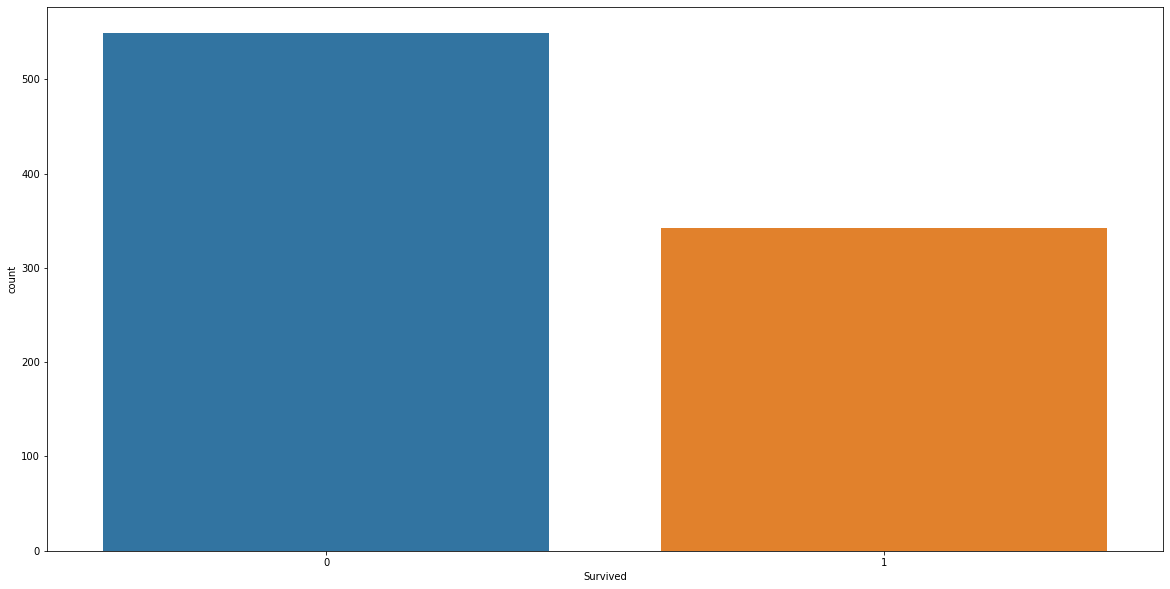

In [17]:
sns.countplot(x='Survived', data=data)

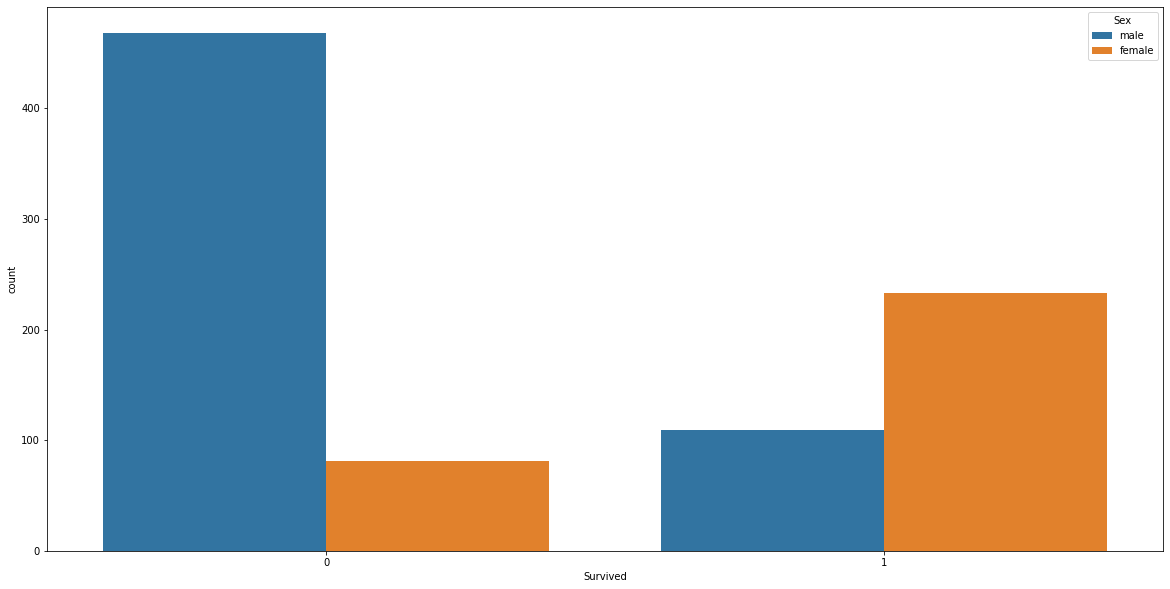

In [18]:
sns.countplot(x='Survived', data=data, hue='Sex')

CHECKING NULL VALUES


In [19]:
data.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [20]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking upon null values - it is seen that in Age there are 177 null values which is lesser than null values in Cabin

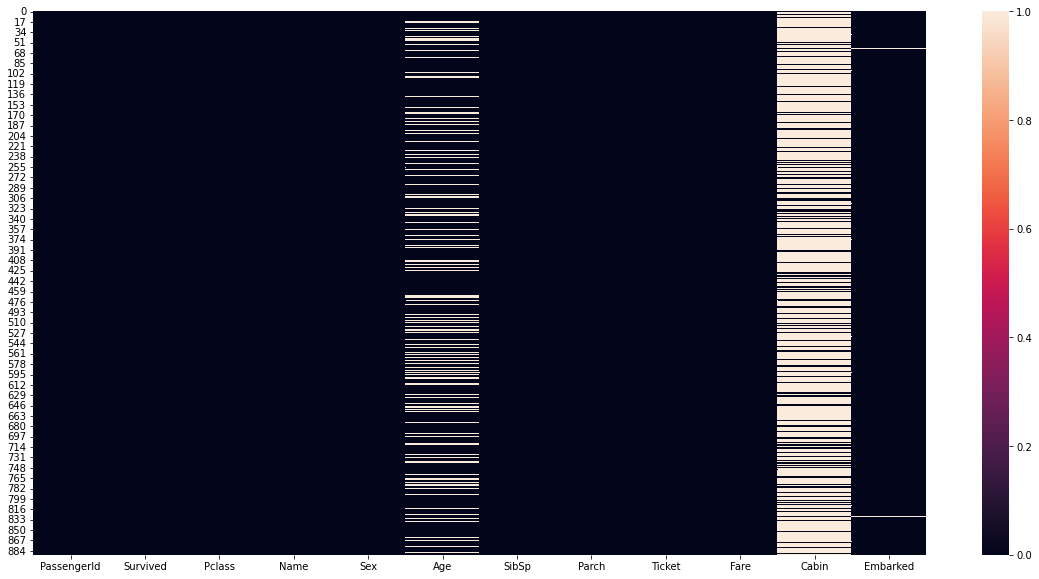

In [23]:
#Visualizing null values with heat maps
sns.heatmap(data.isna())

In [24]:
#lets check the percentage of null values, for computation estimation 
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
data['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [26]:
(data['Age'].isna().sum()/len(data['Age']))*100

19.865319865319865

We can observe here - that in Age col - there are 19.86 percent of null values 

In [27]:
(data['Cabin'].isna().sum()/len(data['Cabin']))*100

77.10437710437711

It is observed that 77% of values are null - hence it is not required to have this col

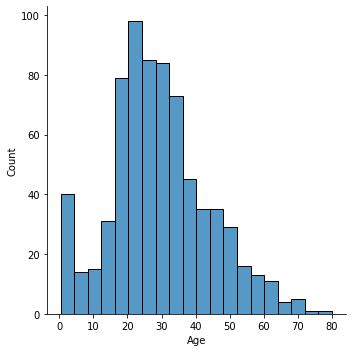

In [28]:
sns.displot(x='Age', data=data)  #distribution plot 

# Data Cleaning

In [30]:
#Find the mean of the col
#fill the missing values 
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [31]:
data['Age'].isna().sum()

0

Now we can see there are no null values in the age col

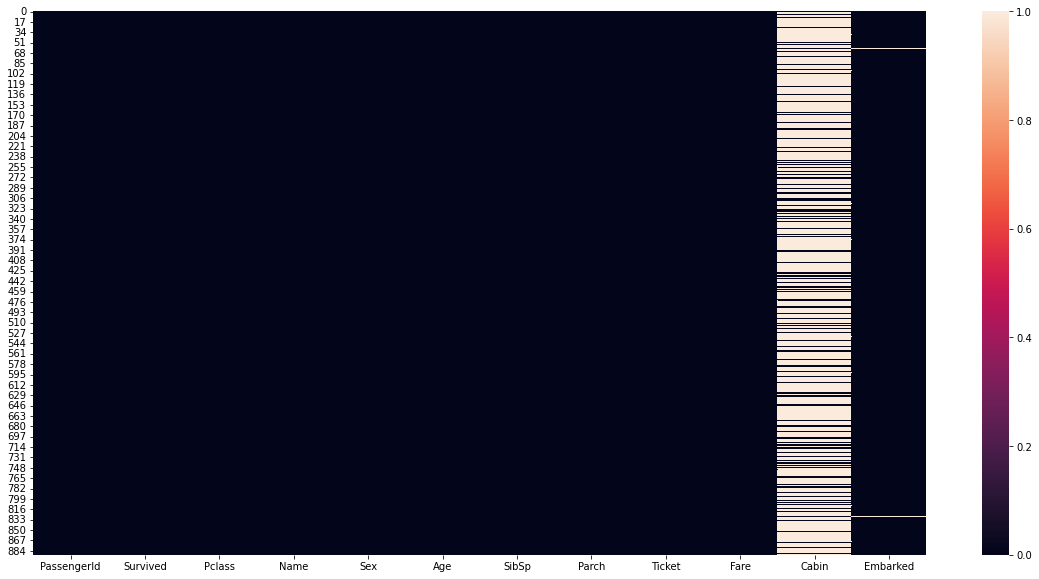

In [32]:
sns.heatmap(data.isna())

In [33]:
#We will now discard the column 
data.drop('Cabin',axis=1,inplace=True)

In [35]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [40]:
data.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

Cabin col is no longer available

Preparing Data for the model

In [43]:
#Check for numeric and non numeric col
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [45]:
#WE NEED   to convert the sex column as dummy int dt
pd.get_dummies(data['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

In [47]:
gender = pd.get_dummies(data['Sex'], drop_first=True)

In [48]:
data['Gender']=gender

In [50]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Gender  
0      0         A/5 21171   7.2500        S       1  
1      0          PC 17599  71.2833        C       0  
2      0  STON/O2. 3101282   7.9250        S       0  
3      0            113803  53.1000        S       0  
4      0            373450   8.0500        S       1

Gender column has been added - as single numeric values of 1 as male and 0 as female

In [52]:
data.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [53]:
data.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Gender
0            1         0       3  22.0      1      0   7.2500       1
1            2         1       1  38.0      1      0  71.2833       0
2            3         1       3  26.0      0      0   7.9250       0
3            4         1       1  35.0      1      0  53.1000       0
4            5         0       3  35.0      0      0   8.0500       1

In [54]:
#Seperate Independent and dependent variables 
x=data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=data['Survived']

In [55]:
x

PassengerId  Pclass        Age  SibSp  Parch     Fare  Gender
0              1       3  22.000000      1      0   7.2500       1
1              2       1  38.000000      1      0  71.2833       0
2              3       3  26.000000      0      0   7.9250       0
3              4       1  35.000000      1      0  53.1000       0
4              5       3  35.000000      0      0   8.0500       1
..           ...     ...        ...    ...    ...      ...     ...
886          887       2  27.000000      0      0  13.0000       1
887          888       1  19.000000      0      0  30.0000       0
888          889       3  29.699118      1      2  23.4500       0
889          890       1  26.000000      0      0  30.0000       1
890          891       3  32.000000      0      0   7.7500       1

[891 rows x 7 columns]

In [56]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# DATA MODELING 
build model using logestic regression 

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
#Train the test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [64]:
#fit logistic regression 
lr=LogisticRegression()

In [65]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [72]:
#predictions
predict=lr.predict(x_test)

# DATA TESTING

In [68]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test,predict)

array([[151,  24],
       [ 37,  83]])

In [73]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No            151             24
Actual Yes            37             83

In [78]:
#For accuracy - we will import  classification report
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



# The precision appears to be 0.78 ie 78 % - > which is Okay, and the precision can be increased with the use of other models or other features.
